Data is downloaded from 
https://archive.usgs.gov/archive/sites/speclab.cr.usgs.gov/spectral.lib06/ds231/datatable.html

W1R1Bb ASCII data for each endmember.

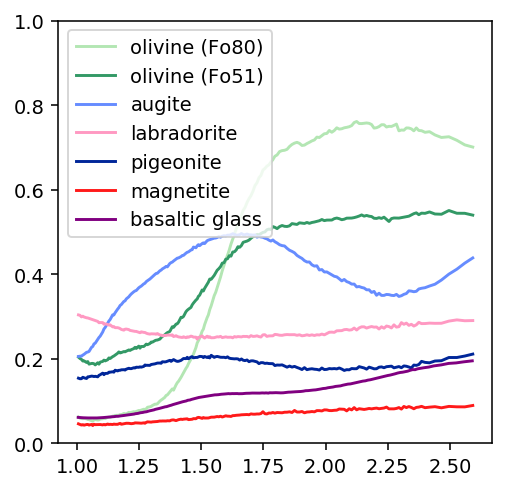

In [1]:
from utils.plotting import *
plot_endmembers()
# Endmembers used in CRISM analysis (USGS + basaltic glass from RELAB)

## Handling CRISM data

Download all the data on the PDS site, open the .hdr TRDR image in CAT ENVI, convert PDS to CAT, save, and then open here.  

Use library called Spectral Python (SPy) http://www.spectralpython.net/user_guide.html to access the data and manipulate it in Numpy. 

In [1]:
# Select data source & pull down data

import numpy as np
from spectral import imshow
import spectral.io.envi as envi
from utils.constants import * 
%matplotlib inline


(182, 640, 438)


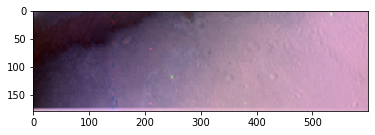

In [2]:
CRISM_DATA_PATH = DATA_DIR + 'GALE_CRATER/cartOrder_part_0002/cartorder/'
CRISM_IMG = CRISM_DATA_PATH + 'frs00028346_01_if169l_trr3_CAT.img'
spy_image = envi.open(file=CRISM_IMG + '.hdr')
print(spy_image.shape)
# Only valid for these pixels
VALID_IMAGE = spy_image[1:180,31:631,:]
bands = (233, 71, 18)
view = imshow(data=VALID_IMAGE, bands=bands)

(450, 640, 438)


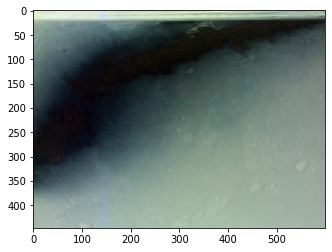

In [3]:
# For filtering GALE_CRATER/cartorder/cartorder/frt0002037a_07_if165l_trr3_CAT
# Use only these pixels:
CRISM_DATA_PATH = DATA_DIR + 'GALE_CRATER/cartorder/cartorder/'
CRISM_IMG = CRISM_DATA_PATH + 'frt0002037a_07_if165l_trr3_CAT.img'
spy_image = envi.open(file=CRISM_IMG + '.hdr')

print(spy_image.shape)
VALID_IMAGE = spy_image[2:449,31:631,:]
bands = (233, 71, 18)
view = imshow(data=VALID_IMAGE, bands=bands)

### Layering CRISM images
Layer frt0002037a_07_if165l_trr3.img and frt0002037a_07_if165s_trr3.img, the difference is the detector 'l' or 's'.  Where S = Visible-near infrared (0.4 - 1 µm) and L = Infrared (1 - 4 µm).

In [1]:
import numpy as np
from spectral import imshow
import spectral.io.envi as envi
from utils.constants import * 
%matplotlib inline


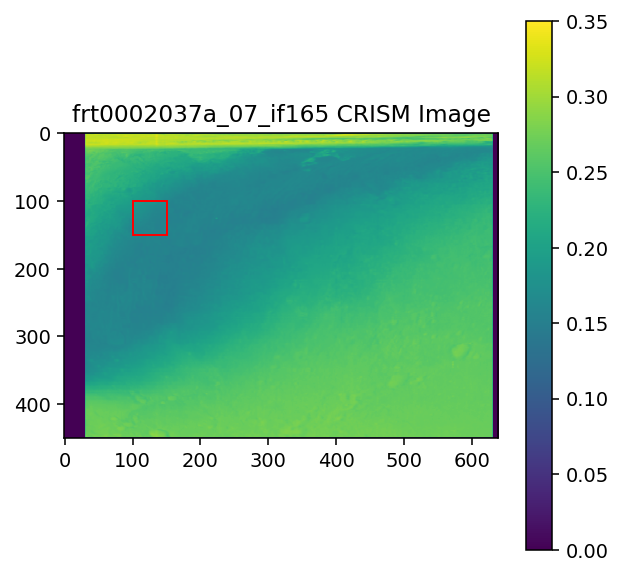

In [2]:
IMG_DIR = 'cartOrder/cartorder/'
IMG_NAME = 'frt0002037a_07_if165'
with open(DATA_DIR + 'GALE_CRATER/' + IMG_DIR  + 'layered_img.pickle', 'rb') as handle:
    loaded_img = pickle.load(handle)

coords = [100, 150, 100, 150]
from utils.plotting import *
plot_zoomed_sectioned_CRISM(loaded_img, coords)



Save section of image

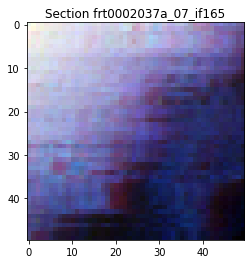

In [4]:
# Save section of image
with open(DATA_DIR + 'GALE_CRATER/' + IMG_DIR  + 'layered_img.pickle', 'rb') as handle:
    loaded_img = pickle.load(handle)
    
view = imshow(loaded_img[100:150,100:150,:], 
              bands= (120, 71, 18), 
              title="Section " + IMG_NAME)
with open(DATA_DIR + 'GALE_CRATER/' + IMG_DIR + 'layered_img_sec_100_150.pickle', 'wb') as f:
    pickle.dump(loaded_img[100:150,100:150,:], f)
    
    

In [ ]:
IMG_DIR = 'cartOrder/cartorder/'
IMG_NAME = 'frt0002037a_07_if165'
S_IMG_WAVELENGTHS = IMG_DIR + 's_pixel_201_200.txt'
L_IMG_WAVELENGTHS = IMG_DIR + 'l_pixel_x_201_y_200.txt'

# record_layered_data(IMG_DIR, IMG_NAME, S_IMG_WAVELENGTHS, L_IMG_WAVELENGTHS)

with open(DATA_DIR + 'GALE_CRATER/' + IMG_DIR  + 'layered_img_section.pickle', 'rb') as handle:
    loaded_img = pickle.load(handle)
# view = imshow(loaded_img[10:420,100:621,:], bands= (200, 71, 18), title="Layered " + IMG_NAME)
view = imshow(loaded_img, bands= (120, 71, 18), title="Layered subsection of " + IMG_NAME)



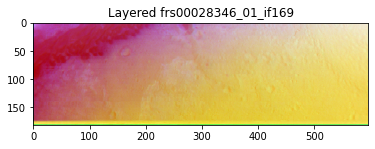

In [8]:
IMG_DIR = 'cartOrder_part_0002/cartorder/'
IMG_NAME = 'frs00028346_01_if169'
S_IMG_WAVELENGTHS = IMG_DIR + 's_pixel_262_48.txt'
L_IMG_WAVELENGTHS = IMG_DIR + 'l_pixel_201_91.txt'

# record_layered_data(IMG_DIR, IMG_NAME, S_IMG_WAVELENGTHS, L_IMG_WAVELENGTHS)

with open(DATA_DIR + 'GALE_CRATER/' + IMG_DIR  + 'layered_img.pickle', 'rb') as handle:
    loaded_img = pickle.load(handle)
view = imshow(loaded_img[:182,30:626,:], bands= (200, 71, 18), title="Layered " + IMG_NAME)

## Normalizing spectra

In [2]:
from utils.access_data import *
from utils.constants import *

In [2]:
IMG_DIR = DATA_DIR + 'GALE_CRATER/cartOrder/cartorder/'
image_file = IMG_DIR + 'layered_img_section.pickle'
wavelengths_file = IMG_DIR + 'layered_wavelengths.pickle'

record_reduced_spectra(wavelengths_file)

RELAB min:0.28 max: 2.6 count: 465
USGS min:0.2051 max: 2.976 count: 480
CRISM min:0.36462 max: 4.0 count: 545
not adding 2.624
CRISM_reduced min:0.36462 max: 2.58891 count: 277

 All reduced spectra should have same length 
CRISM : 277
USGS 277
BASALT 277


Analyze resulting normalized wavelengths of spectra across RELAB, USGS, and CRISM data. 

In [3]:

# wavelengths that are treated equally across USGS, RELAB, and CRISM

with open(MODULE_DIR + "/utils/FILE_CONSTANTS/RW_BASALT.pickle", 'rb') as handle:
    basaltrw = pickle.load(handle)
with open(MODULE_DIR + "/utils/FILE_CONSTANTS/RW_USGS.pickle", 'rb') as handle:
    RW_USGS = pickle.load(handle)
with open(MODULE_DIR + "/utils/FILE_CONSTANTS/RW_CRISM.pickle", 'rb') as handle:
    RW_CRISM = pickle.load(handle)

print("The resulting spectra have an equal number of wavelengths.")
print("RELAB " + str(len(basaltrw)))
print("USGS: " + str(len(RW_USGS)))
print("CRISM: " + str(len(RW_CRISM)))

print("\n The following represents which wavelengths are compared to each other")
print("RELAB vs. USGS vs. CRISM")
for index, val in enumerate(basaltrw):
    basalt = val
    usgs = RW_USGS[index]
    crism = RW_CRISM[index]
    print(str(basalt) + "  vs.  " + str(usgs ) +  "  vs.  " + str(crism))

The resulting spectra have an equal number of wavelengths.
RELAB 277
USGS: 277
CRISM: 277

 The following represents which wavelengths are compared to each other
RELAB vs. USGS vs. CRISM
0.365  vs.  0.3666  vs.  0.36462
0.37  vs.  0.3726  vs.  0.37112
0.38  vs.  0.3811  vs.  0.37762
0.385  vs.  0.3851  vs.  0.38412
0.39  vs.  0.3911  vs.  0.39062
0.4  vs.  0.4011  vs.  0.39712
0.405  vs.  0.4051  vs.  0.40362
0.41  vs.  0.4111  vs.  0.41012
0.42  vs.  0.4218  vs.  0.41662
0.425  vs.  0.4278  vs.  0.42312
0.43  vs.  0.4308  vs.  0.42963
0.435  vs.  0.4368  vs.  0.43613
0.44  vs.  0.4428  vs.  0.44263
0.45  vs.  0.4513  vs.  0.44914
0.46  vs.  0.4613  vs.  0.45564
0.465  vs.  0.4653  vs.  0.46215
0.47  vs.  0.4713  vs.  0.46865
0.475  vs.  0.4753  vs.  0.47516
0.485  vs.  0.4853  vs.  0.48167
0.49  vs.  0.4913  vs.  0.48817
0.495  vs.  0.4953  vs.  0.49468
0.5  vs.  0.5013  vs.  0.50119
0.51  vs.  0.5113  vs.  0.5077
0.515  vs.  0.5153  vs.  0.51421
0.52  vs.  0.5213  vs.  0.52072
0.53  